In [1]:
from ip_geo2 import *

In [2]:
import matplotlib.dates as mdates

def date_format(ax):
    
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    ax.xaxis.set_minor_formatter(mdates.DateFormatter('%-d'))
    ax.xaxis.set_major_locator(mdates.MonthLocator(bymonthday = 1) )
    ax.xaxis.set_minor_locator(mdates.DayLocator(bymonthday = [8, 15, 22]) )
    ax.xaxis.set_tick_params(pad = 4, labelsize = 14, which = "major")


In [3]:
chicago_ip = get_data()
chicago_ip.rename(columns = {"latitude" : "lat", "longitude" : "lon"}, inplace = True)

chicago_ip["local_date_time"] = pd.to_datetime(chicago_ip.local_date_time)
chicago_ip["hour"] = chicago_ip.local_date_time.dt.round('h')
chicago_ip["day"]  = chicago_ip.local_date_time.dt.round('d')  

15643814 2.127558704


In [4]:
chicago_ip.groupby("DBA").DBA.count().sort_values(ascending = False).head(7)

DBA
T-Mobile    4606423
ATT         3119312
Comcast     2669211
Sprint      2301770
Verizon     1677817
IANA         631780
RCN          196579
Name: DBA, dtype: int64

In [5]:
chicago_ip["DBA6"] = "Other"

big5 = ["ATT", "Comcast", "T-Mobile", "Sprint", "Verizon"]
chicago_ip.loc[chicago_ip.DBA.isin(big5), "DBA6"] = chicago_ip.loc[chicago_ip.DBA.isin(big5)].DBA

In [6]:
totals = chicago_ip.groupby(["day", "DBA6"]).sum().bump_count.unstack()
totals = totals[["Comcast", "ATT", "T-Mobile", "Sprint", "Verizon", "Other"]]
fractions = totals.divide(totals.sum(axis = 1), axis = 0)

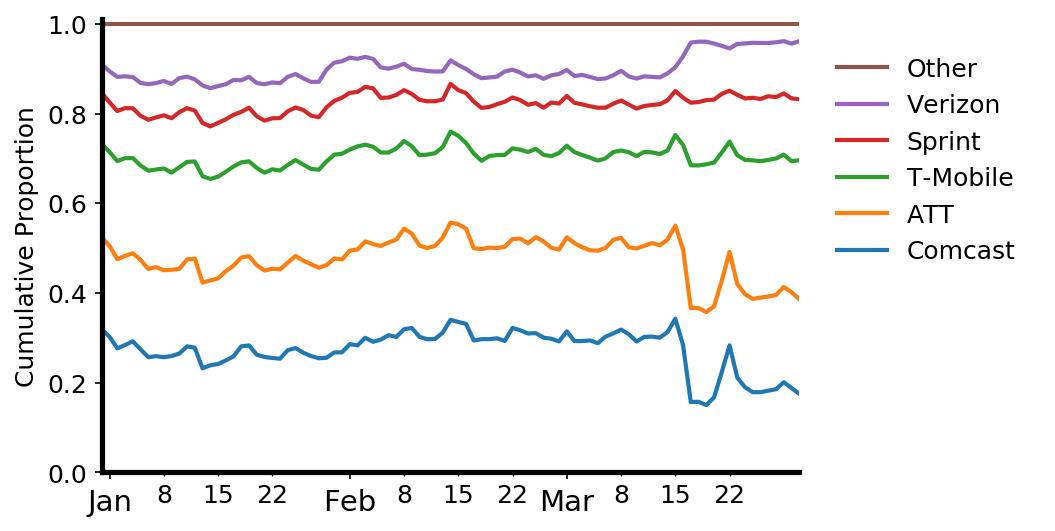

In [9]:
ax = fractions.cumsum(axis = 1).plot()

ax.set_xlabel("")
ax.set_ylim(0, 1.01)
ax.set_ylabel("Cumulative Proportion")

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor = (1, 1), loc = "upper left")

date_format(ax)